# HDF5 file creation

In [1]:
from src import _PATH_DATA
import numpy as np
import pandas as pd
from tifffile import tifffile
import h5py

In [2]:
files = pd.read_csv(f"{_PATH_DATA}/synthetic_fibers/train.csv", header=0).img_path.to_list()

In [3]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    img_shape = tifffile.imread(f"{_PATH_DATA}/{files[0]}").shape
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), 300,300), dtype='uint8')
        
        # Loop through all images and save them to the dataset
        for i, file in enumerate(files):
            vol = tifffile.imread(f"{_PATH_DATA}/{file}")
            vol -= vol.min()
            vol = vol/vol.max()
            vol = vol.transpose(2,1,0)
            dataset[i] = vol[:,:,150]
# Usage
create_hdf5_dataset(files, f"{_PATH_DATA}/synthetic_fibers/train_slice.hdf5")


In [4]:
with h5py.File(f"{_PATH_DATA}/synthetic_fibers/train_slice.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)

(1000, 300, 300)


In [2]:
1000*300/10

30000.0

In [65]:
import qim3d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm
import pandas as pd
from skimage.draw import ellipse
from src import _PATH_DATA
import h5py
from skimage.transform import resize

In [66]:
files = []
# files.append(glob(f"{_PATH_DATA}/Task10_Colon/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task10_Colon/imagesTs/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task03_Liver/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task03_Liver/imagesTs/*.nii.gz"))
files.append(glob(f"{_PATH_DATA}/Task07_Pancreas/imagesTr/*.nii.gz"))
files.append(glob(f"{_PATH_DATA}/Task07_Pancreas/imagesTs/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task09_Spleen/imagesTr/*.nii.gz"))
# files.append(glob(f"{_PATH_DATA}/Task09_Spleen/imagesTs/*.nii.gz"))
files = [item for sublist in files for item in sublist]

In [67]:
shapes = {}
for file in tqdm(files):
    vol = qim3d.io.load(file,progress_bar=False,virtual_stack=True)
    
    shapes[file] = {"x":vol.shape[0],
               "y":vol.shape[1],
               "z":vol.shape[2],}

  0%|          | 0/420 [00:00<?, ?it/s]

Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack
Using virtual stack


In [68]:
df = pd.DataFrame.from_dict(shapes,orient="index")

(array([ 28.,  16.,  41., 137., 133.,  37.,  11.,   6.,   3.,   4.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 37.  ,  51.28,  65.56,  79.84,  94.12, 108.4 , 122.68, 136.96,
        151.24, 165.52, 179.8 , 194.08, 208.36, 222.64, 236.92, 251.2 ,
        265.48, 279.76, 294.04, 308.32, 322.6 , 336.88, 351.16, 365.44,
        379.72, 394.  , 408.28, 422.56, 436.84, 451.12, 465.4 , 479.68,
        493.96, 508.24, 522.52, 536.8 , 551.08, 565.36, 579.64, 593.92,
        608.2 , 622.48, 636.76, 651.04, 665.32, 679.6 , 693.88, 708.16,
        722.44, 736.72, 751.  ]),
 <BarContainer object of 50 artists>)

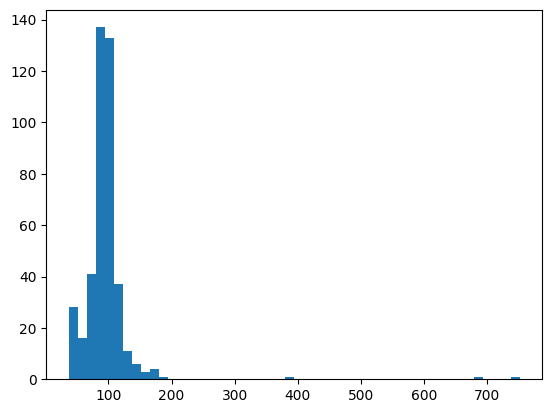

In [69]:
plt.hist(df.z,bins=50)

In [70]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    vol_shape = (256,256,50)
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), *vol_shape), dtype='float32')
        
        # Loop through all images and save them to the dataset
        for i, file in tqdm(enumerate(files),unit="vol", desc="Saving volumes to hdf5 file"):
            vol = qim3d.io.load(file,progress_bar=False)
            vol = np.clip(vol, -1000,500)
            vol -= vol.min()
            vol /= vol.max()
        
            diff = 100-vol.shape[2]
            if diff == 0:
                vol = vol
            elif 2*(diff//2)+vol.shape[2] != 100:
                vol = np.pad(vol,((0,0),(0,0),(diff//2,diff//2+1)))
            else:
                vol = np.pad(vol,((0,0),(0,0),(diff//2,diff//2)))
                
            vol = resize(vol,(256,256,50), anti_aliasing=True)
            
            dataset[i] = vol

In [83]:
df2 = pd.DataFrame(df.index[df.z<100], columns=["file_path"])

In [79]:
df2.to_csv(f"{_PATH_DATA}/Task07_Pancreas/train.csv",index=False)

In [ ]:
create_hdf5_dataset(list(df2.file_path), f"{_PATH_DATA}/Task07_Pancreas/train_small.hdf5")

In [85]:
vol_shape = (256,256,376)
    
# Create HDF5 file
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train_one.hdf5", 'w') as hdf5_file:
    # Create a dataset in the file
    dataset = hdf5_file.create_dataset('volumes', (1, *vol_shape), dtype='float32')

    vol = qim3d.io.load('/work3/s164564/CT-Reconstruction-Neural-Representation/data/Task07_Pancreas/imagesTr/pancreas_409.nii.gz',progress_bar=False)
    vol = np.clip(vol, -1000,500)
    vol -= vol.min()
    vol /= vol.max()

    vol = np.pad(vol,((0,0),(0,0),(0,1)))
        
    vol = resize(vol,(256,256,376), anti_aliasing=True)
    
    dataset[0] = vol


qim3d.viz.vol(vol)

Volume using 751.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 30.0 GB (4.0%)
 • Free..: 725.0 GB (96.0%)


Output()

In [114]:
376/8

47.0

<BarContainer object of 50 artists>

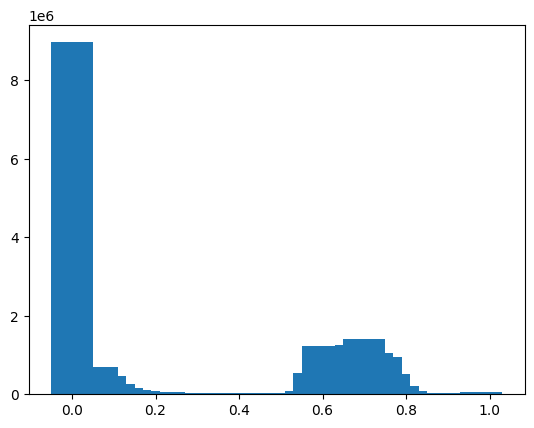

In [251]:
hist, bin_edge = np.histogram(vol,bins=50)
plt.bar(bin_edge[:-1],hist,width=0.1)

In [183]:
bin_edge

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32)

In [191]:
qim3d.viz.slicer(vol,axis=2)

interactive(children=(IntSlider(value=43, description='Slice', max=86), Output()), layout=Layout(align_items='…

In [344]:
with h5py.File(f"{_PATH_DATA}/Task07_Pancreas/train_small.hdf5", 'r') as f:
    dataset = f["volumes"]
    vol = dataset[0,:,:,:]

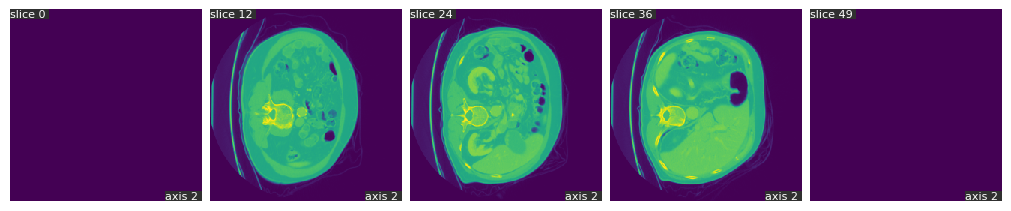

In [345]:
qim3d.viz.slices(vol,axis=2)

In [346]:
qim3d.viz.vol(vol)

Output()

In [7]:
import numpy as np
import qim3d
import h5py
from src import _PATH_DATA
from scipy.ndimage import gaussian_filter

In [2]:
data=np.ones((25,100,100,100),dtype="float32")*0.1
counter = 0
for i in range(5):
    for j in range(5):
        data[counter,i*20:(i+1)*20,j*20:(j+1)*20,:] = 1
        counter += 1

data = gaussian_filter(data, sigma=1, mode="constant",axes=(1,2,3))
vol_shape = data.shape

In [3]:
# Create HDF5 file
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'w') as hdf5_file:
    # Create a dataset in the file
    dataset = hdf5_file.create_dataset('volumes', (25,100,100,100), dtype='float32')
    dataset[:,:,:,:] = data

In [6]:
with h5py.File(f"{_PATH_DATA}/cube_data-Copy1.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)
    qim3d.viz.vol(dataset[1])

(25, 100, 100, 100)


Output()

In [12]:
data = qim3d.io.load(f"{_PATH_DATA}/FiberDataset/filaments_volume_10.nii")
qim3d.viz.vol(data)

Loading:   0%|          | 0.00B/64.0MB  [00:00<?, ?B/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 71.4 GB (9.5%)
 • Free..: 683.6 GB (90.5%)


Output()

In [29]:
import qim3d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm
import pandas as pd
from skimage.draw import ellipse
from src import _PATH_DATA
import h5py
from skimage.transform import resize

In [31]:
files = glob(f"{_PATH_DATA}/FiberDataset/filaments_volume*.nii")

In [32]:
df = pd.DataFrame(data=files, columns=["vol_path"])

In [47]:
df.to_csv(f"{_PATH_DATA}/FiberDataset/filaments_volumes.csv",index=False)

In [55]:
def create_hdf5_dataset(files, hdf5_path):
    # Open the first image to get the shape
    vol_shape = (256,256,256)
    
    # Create HDF5 file
    with h5py.File(hdf5_path, 'w') as hdf5_file:
        # Create a dataset in the file
        dataset = hdf5_file.create_dataset('volumes', (len(files), *vol_shape), dtype='float32')
        
        # Loop through all images and save them to the dataset
        for i, file in tqdm(enumerate(files),unit="vol", desc="Saving volumes to hdf5 file"):
            vol = qim3d.io.load(file,progress_bar=False)
            vol = vol.transpose(2,1,0)
            dataset[i] = vol

In [56]:
create_hdf5_dataset(df.vol_path.to_list(),f"{_PATH_DATA}/FiberDataset/filaments_volumes.hdf5")

Saving volumes to hdf5 file: 0vol [00:00, ?vol/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 18.7 GB (2.5%)
 • Free..: 736.3 GB (97.5%)
Volume using 64.0 MB of memory



(300, 256, 256, 256)


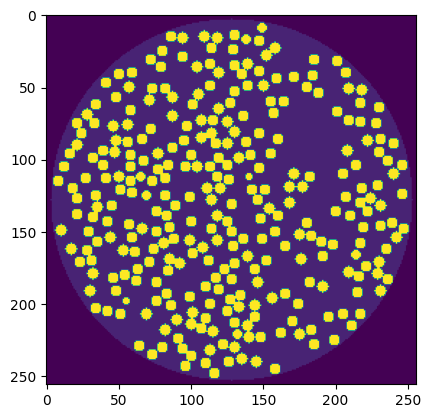

In [57]:
with h5py.File(f"{_PATH_DATA}/FiberDataset/filaments_volumes.hdf5", 'r') as f:
    dataset = f["volumes"]
    print(dataset.shape)
    plt.imshow(dataset[0][:,:,50])
    

# Test pretrained model

In [24]:
import numpy as np
import pandas as pd
import tifffile
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField, NeuralField_adversarial
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt

from IPython.display import HTML
from base64 import b64encode
import matplotlib.animation as animation
from pylab import *

def ani_frame(frames,name="video"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(frames[0],cmap='gray',interpolation="none")
    im.set_clim([0,255])
    fig.set_size_inches([5,5])


    tight_layout()


    def update_img(n):
        tmp = frames[n]
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,frames.shape[0],interval=300)
    writer = animation.writers['ffmpeg'](fps=10)

    ani.save(f'{name}.mp4',writer=writer,dpi=100)
    return ani

args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'cube_data.hdf5',
        "seed":42,
        "checkpoint_path":"imagefit_cube_adversarial_None_sine_latent-size-32-2024-09-19-1457/last.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":512,
        "imagefit_mode":True,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 5,
        "num_hidden_features": 64,
        "num_freq_bands": 6,
        "encoder":None,
        "activation_function": 'sine',
        "latent_size": 32,
        "volume_sidelength": (100,100,100),
    },
}

In [8]:
num_volumes = h5py.File(f"{_PATH_DATA}/{args_dict['general']['data_path']}", "r")["volumes"].shape[0]
# projection_shape = np.load(f"{args_dict['general']['data_path']}_projections.npy").shape
model = NeuralField_adversarial(args_dict, 
            projection_shape=(300,300),
            num_volumes=num_volumes,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

/tmp/ipykernel_823289/3049977548.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], stri

In [9]:
idx = 0
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
    dataset = f["volumes"]
    img = dataset[idx]
    # img = img.transpose(2,0,1)

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        vec = model.lat_vecs(torch.tensor([idx],device="cuda")).repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
        outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs -= outputs.min()
outputs /= outputs.max()
# tifffile.imwrite(f"reconstruction_mlp_{idx}.tif",(outputs.numpy()*255).astype("uint8"))
# tifffile.imwrite(f"real_vol_{idx}.tif",(img*255).astype("uint8"))

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.0977)
tensor(0.8999)


In [10]:
qim3d.viz.vol(outputs.detach().cpu().numpy())

Output()

In [11]:
vectors = model.lat_vecs(torch.arange(25,device="cuda")).detach().cpu()

In [12]:
# pdist = torch.nn.PairwiseDistance(p=2)
# smallest_dist = 999999
# smallest_idx = 0
# for i in range(1,1000):
#     dist = pdist(vectors[0],vectors[i])
#     if dist < smallest_dist:
#         smallest_dist = dist
#         smallest_idx = i

In [13]:
idx = 24
with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
    dataset = f["volumes"]
    img = dataset[idx]
    img = img.transpose(2,0,1)

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        vec = model.lat_vecs(torch.tensor([idx],device="cuda")).repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
        outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs -= outputs.min()
outputs /= outputs.max()
# tifffile.imwrite(f"reconstruction_mlp_{idx}.tif",(outputs.numpy()*255).astype("uint8"))
# tifffile.imwrite(f"real_vol_{idx}.tif",(img*255).astype("uint8"))

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.0976)
tensor(0.9000)


In [14]:
qim3d.viz.vol(outputs.detach().cpu().numpy())

Output()

In [15]:
smallest_idx = 24
for j in tqdm(range(101)):
    start = model.lat_vecs(torch.tensor([0],device="cuda")).detach()
    end = model.lat_vecs(torch.tensor([smallest_idx],device="cuda")).detach()
    vec_inter = torch.lerp(start,end,j/100)
    
    idx = smallest_idx
    with h5py.File(f"{_PATH_DATA}/cube_data.hdf5", 'r') as f:
        dataset = f["volumes"]
        img = dataset[idx]
        img = img.transpose(2,0,1)
    
    mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
    outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
    for i in range(mgrid.shape[0]):
        with torch.no_grad():
            vec = vec_inter.repeat(mgrid[i].shape[0],mgrid[i].shape[1],1,1).permute(2,0,1,3).contiguous().view(-1,args_dict['model']['latent_size'])
            outputs[i] = model(mgrid[i].view(-1,3).cuda(), vec).view(outputs[i].shape)
    
    outputs -= outputs.min()
    outputs /= outputs.max()
    tifffile.imwrite(f"interpolations_cube/reconstruction_mlp_{0}-{smallest_idx}_{j}-percent.tif",(outputs.numpy()*255).astype("uint8"))

  0%|          | 0/101 [00:00<?, ?it/s]

In [17]:
qim3d.viz.vol(tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_50-percent.tif"))

Output()

In [19]:
frames = []
start = tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_0-percent.tif")[:,:,50]
end = tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_100-percent.tif")[:,:,50]
for _ in range(10):
    frames.append(start)
for i in range(1,100):
    frames.append(tifffile.imread(f"interpolations_cube/reconstruction_mlp_0-{smallest_idx}_{i}-percent.tif")[:,:,50])
for _ in range(10):
    frames.append(end)
frames = np.array(frames)

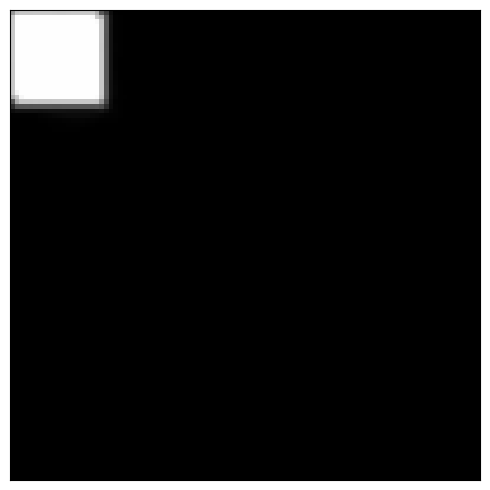

In [25]:
name = "interpolation_cube"
ani = ani_frame(frames,name=name)

In [26]:
name = "interpolation_cube"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [27]:
name = "cube_latent_space"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [28]:
name = "cube_latent_space_adversarial"
mp4 = open(f'{name}.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=720 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

| Data                	| FWP 	| SIRT 	| ours w/o pretrained 	| Ours 	|
|---------------------	|-----	|------	|---------------------	|------	|
| fiber plenoptic 6x6 	|     	|      	|                     	|      	|
| fiber plenoptic 5x5 	|     	|      	|                     	|      	|
| fiber plenoptic 4x4 	|     	|      	|                     	|      	|
| fiber plenoptic 3x3 	|     	|      	|                     	|      	|
| fiber rotation 36   	|     	|      	|                     	|      	|
| fiber rotation 25   	|     	|      	|                     	|      	|
| fiber rotation 16   	|     	|      	|                     	|      	|
| fiber rotation 9    	|     	|      	|                     	|      	|
| Other dataset       	|     	|      	|                     	|      	|
| yet another dataset 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|
| ...                 	|     	|      	|                     	|      	|

In [60]:
import qim3d

In [77]:
vol = qim3d.io.load("/work3/s164564/Fiber-Phantoms/Fiber-phantom-module/FiberDataset/filaments_volume_200.nii")
# vol = qim3d.io.load(f"{_PATH_DATA}/FiberDataset/filaments_volume_0.nii")
qim3d.viz.vol(vol,vmin=0.1)

Loading:   0%|          | 0.00B/64.0MB  [00:00<?, ?B/s]

Volume using 64.0 MB of memory

System memory:
 • Total.: 755.0 GB
 • Used..: 14.5 GB (1.9%)
 • Free..: 740.5 GB (98.1%)


Output()

# Testing single volume reconstruction

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import scipy.ndimage as ndi
import h5py
import qim3d

import torch
import torch._dynamo

from src.dataloaders import CTDataModule
from src.models.mlp import compute_projection_values, NeuralField
from src.models.nfraygan import RayGAN
from src import get_device, _PATH_DATA, _PATH_MODELS
import matplotlib.pyplot as plt

In [2]:
args_dict = {
    "general": {
        "experiment_name": "test",
        "data_path":f'FiberDataset/filaments_volumes_100',
        "seed":42,
        "checkpoint_path":"raygan_hashgrid_relu_regularization-weight-0.005_noise-level-None-2024-10-30-1030\epoch=152.ckpt",
        
    },
    "training": {
        "num_epochs": 1,
        "batch_size": 100,
        "model_lr":1e-4,
        "latent_lr":1e-4,
        "discriminator_lr":1e-4,
        "device":"cuda",
        "num_workers":0,
        "num_points":256,
        "imagefit_mode":False,
        "noisy_points":False,
        "regularization_weight":1e-1,
        "noise_level":0.03,
        "full_mode":False,
        "adversarial_mode":True,
    },
    "model": { 
        "model_type": "neuralfield",
        "num_hidden_layers": 4,
        "num_hidden_features": 256,
        "num_freq_bands": 6,
        "encoder":"hashgrid",
        "activation_function": 'relu',
        "latent_size": 32,
        "volume_sidelength": (256,256,256),
    },
}

In [3]:
projection_shape = np.load(f"{_PATH_DATA}/{args_dict['general']['data_path']}_projections.npy").shape
model = RayGAN(args_dict, 
            projection_shape=projection_shape,
           ).to(args_dict['training']['device'])

checkpoint_path = f"{_PATH_MODELS}/{args_dict['general']['checkpoint_path']}"
model.load_state_dict(torch.load(checkpoint_path, map_location=None)['state_dict'], strict=False)
model.eval();
model.cuda();

C:\Users\rasmu\AppData\Local\Temp\ipykernel_12308\3298638933.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_locati

In [7]:
idx = 100
with h5py.File(f"{_PATH_DATA}/{args_dict['general']['data_path'][:-4]}.hdf5", 'r') as f:
    dataset = f["volumes"]
    vol = dataset[idx]
    
img = np.zeros((256,256,256))

mgrid = torch.stack(torch.meshgrid(torch.linspace(-1, 1, img.shape[0]), torch.linspace(-1, 1, img.shape[1]), torch.linspace(-1, 1, img.shape[1]), indexing='ij'),dim=-1)
outputs = torch.zeros_like(torch.tensor(img),dtype=torch.float)
for i in tqdm(range(mgrid.shape[0])):
    with torch.no_grad():
        outputs[i] = model(mgrid[i].view(-1,3).cuda()).view(outputs[i].shape)


print(outputs.min())
print(outputs.max())

outputs = outputs.numpy()

  0%|          | 0/256 [00:00<?, ?it/s]

tensor(2.9039e-06)
tensor(1.)


In [9]:
vol = vol.transpose(2,1,0)

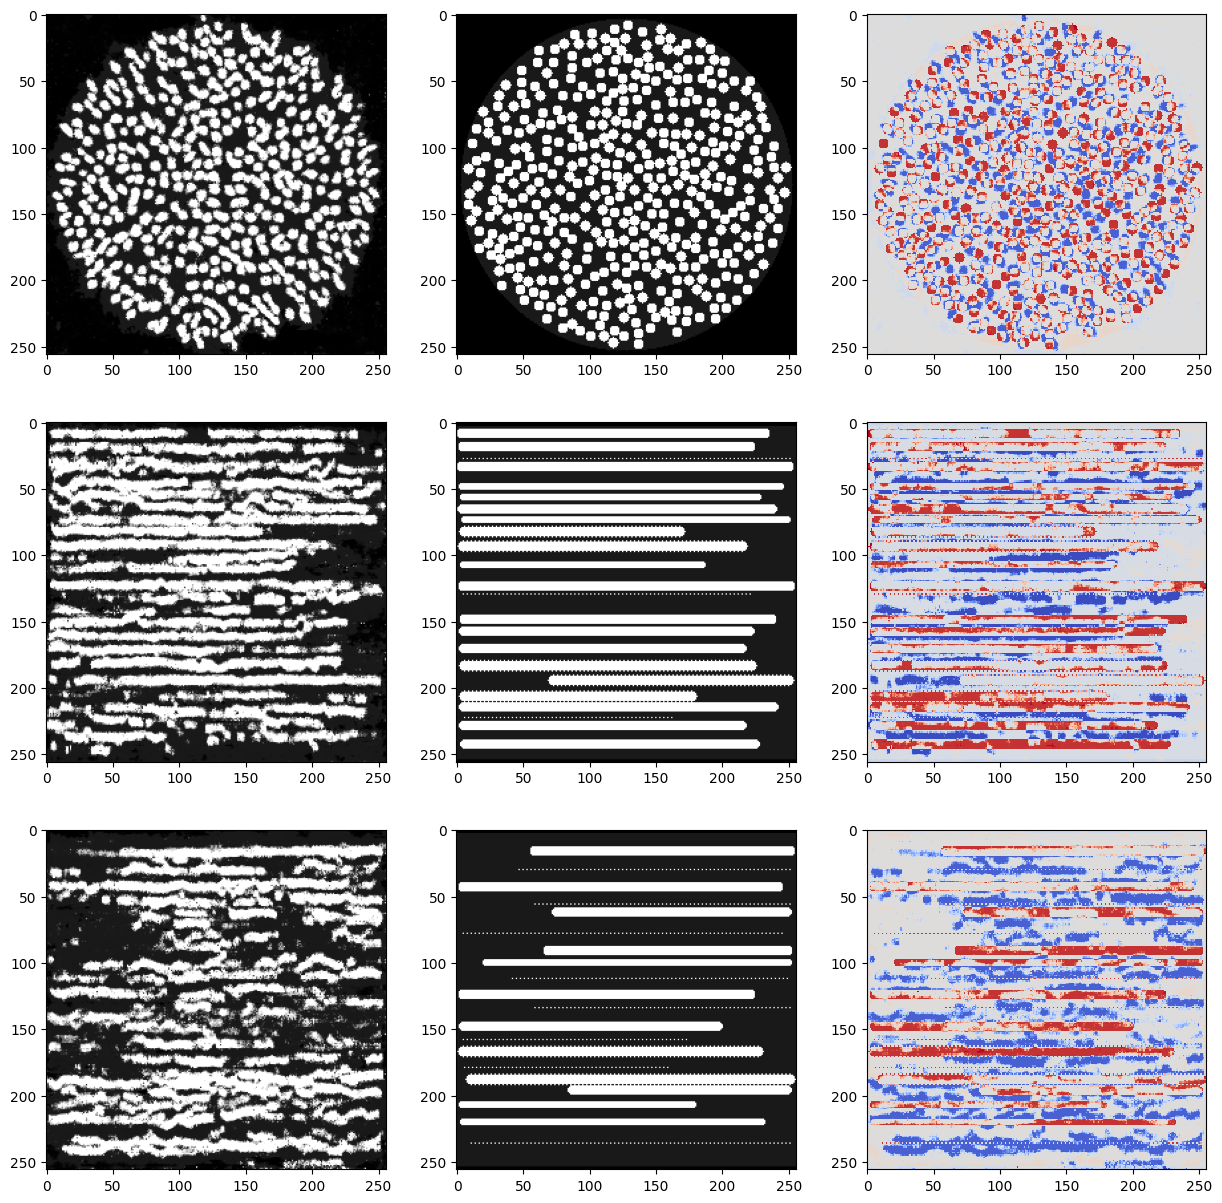

In [45]:
vol_temp = np.flipud(np.rot90(vol,axes=(0,2)))
outputs_temp = np.flipud(np.rot90(outputs,axes=(0,2)))

fig, axs = plt.subplots(3,3, figsize=(15,15))

axs[0,0].imshow(outputs_temp[:,:,128],cmap="gray")
axs[0,1].imshow(vol_temp[:,:,128],cmap="gray")
axs[0,2].imshow(vol_temp[:,:,128] - outputs_temp[:,:,128],interpolation="none",cmap="coolwarm")

axs[1,0].imshow(outputs_temp[:,128,:],cmap="gray")
axs[1,1].imshow(vol_temp[:,128,:],cmap="gray")
axs[1,2].imshow(vol_temp[:,128,:] - outputs_temp[:,128,:],interpolation="none",cmap="coolwarm")

axs[2,0].imshow(outputs_temp[128,:,:],cmap="gray")
axs[2,1].imshow(vol_temp[128,:,:],cmap="gray")
axs[2,2].imshow(vol_temp[128,:,:] - outputs_temp[128,:,:],interpolation="none",cmap="coolwarm")

In [7]:
qim3d.viz.vol(outputs.numpy())

Output()

In [ ]:
import matplotlib
%matplotlib notebook
import fibretracker as ft

In [ ]:
v = outputs.numpy()
coords = ft.models.get_fibre_coords(v)
tracks = ft.models.track_fibres(vol=v, coords=coords, smoothtrack_gaussian=True, sigma=3,track_min_length=50, max_skip=20)
ft.viz.plot_tracks(tracks)

Smoothing tracks using Gaussian       


In [8]:
idx = 100
with h5py.File(f"{_PATH_DATA}/{args_dict['general']['data_path'][:-4]}.hdf5", 'r') as f:
    dataset = f["volumes"]
    img = dataset[idx]

qim3d.viz.vol(img)

Output()

# Modifying parameter json for fiber phantom creation

In [1]:
import h5py
from src import _PATH_DATA
import json

In [46]:
with open("/work3/s164564/Fiber-Phantoms/Fiber-phantom-module/fiber_phantom/parameters.json") as f_in:
    params = json.load(f_in)

with h5py.File(f"{_PATH_DATA}/FiberDataset/volume_and_reconstruction_294.hdf5", 'r') as f:
    for key in f.attrs:
        params[key] = f.attrs[key]

In [58]:
params["random_seed"] = 1337
params['num_volumes'] = 25
params['volume_dimensions']= [256, 256, 256]
params['pipe_radius']= 125
params['num_filaments']= 600
params['min_length']= 50
params['max_length']= 200
params['radius']= 4
params['generator_mode']= 'full_wave_curve'
params['preferred_direction']= [1, 0, 0]
params['bias']= 1.0
params['defect_type']= "none"
params['hole_params']= [{'hole_center': [256, 256, 256], 'hole_radius': 100}]
params['square_notch_params']= [{'square_notch_center': [256, 0], 'square_notch_wh': 100}]
params['v_notch_params']= [{'v_notch_center': [256, 0], 'v_notch_height': 100, 'v_notch_width': 200}]
params['reduced_params']= [{'reduced_center': [256, 256], 'reduced_radius': 200, 'reduced_slice_thickness': 50}]
params['ASTRA_reconstruction']= False
params['num_angles']= 180
params['geometry_type']= 'parallel3d'
params['det_width_u']= 1.0
params['det_width_v']= 1.0
params['det_count_x']= 1024
params['det_count_y']= 1024
params['i0']= 1000000.0
params['gamma']= 0.0002
params['algorithm']= 'SIRT3D_CUDA'
params['show_plots']= False
params['source_origin']= 1000
params['origin_det']= 500

In [59]:
with open("/work3/s164564/Fiber-Phantoms/Fiber-phantom-module/fiber_phantom/parameters.json", 'w') as outfile:
    json.dump(params, outfile)

In [72]:
with h5py.File(f"{_PATH_DATA}/FiberDataset/volume_and_reconstruction_0.hdf5", 'r') as f:
    for key in f.attrs:
        print(key,f.attrs[key])

ASTRA_reconstruction True
algorithm SIRT3D_CUDA
bias 1.0
defect_type none
det_count_x 1024
det_count_y 1024
det_width_u 1.0
det_width_v 1.0
gamma 0.0002
generator_mode full_wave_curve
geometry_type parallel3d
hole_params [{'hole_center': [256, 256, 256], 'hole_radius': 100}]
i0 1000000.0
max_length 200
min_length 50
num_angles 180
num_filaments 600
num_volumes 200
origin_det 500
pipe_radius 125
preferred_direction [1, 0, 0]
radius 4
random_seed 45
reduced_params [{'reduced_center': [256, 256], 'reduced_radius': 200, 'reduced_slice_thickness': 50}]
show_plots False
source_origin 1000
square_notch_params [{'square_notch_center': [256, 0], 'square_notch_wh': 100}]
v_notch_params [{'v_notch_center': [256, 0], 'v_notch_height': 100, 'v_notch_width': 200}]
volume_dimensions [256, 256, 256]


# Testing random stuff

In [1]:
import torch

In [6]:
torch.cuda.get_device_properties(0).total_memory / 2**30

39.4964599609375

In [3]:
!nvidia-smi

Thu Oct 24 09:47:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-PCIE-40GB          On  |   00000000:37:00.0 Off |                    0 |
| N/A   35C    P0             34W /  250W |    1421MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----